**Identify which customers are about to churn:**
- Assign to each one a score between 0 and 1 that tells how likely this customer is going to leave

- If a customer is likely to churn, what actions can be take?

One way to approach this is through **BINARY CLASSIFICATION**

*g(x_i) ≈ y_i*

- x_i: ith observation

- *y_i ∈ {0,1}*

    - 0: negative example
    - 1: positive example

## 3.2. Data preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Tip:** For large data sets, the transpose of the first 5 rows can help get a more clear view of the table's columns and its observations

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


- Make both columns and data entries consistent

In [4]:
# Minimize the column names and replace the blank spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Identify only the categorical columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# For the categorical columns' observations, minimize the strings and replace the blank spaces
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
df.seniorcitizen.unique()

array([0, 1], dtype=int64)

- seniorcitizen is an integer, when it fact is a dummy variable

In [8]:
df.totalcharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

- totalcharges is an object when it should be a number

In [9]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

- This error occureds, because "_" is in the data and pandas does not know how to convert this into a number.

- This happened, because of the previous step to replaced all the blanks spaces with "_"

- Use errors="coerce" and everything that can not be converted, will be converted to NaN

In [10]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [11]:
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
tc.isnull().sum()

11

- There are 11 missing values. Filter the data set using .isnull()

In [13]:
df[tc.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

- Fill the missing values with zero 

- Take in attention that 0 may not be the best approach. There's a need to relate the course of action with business knowledge

In [15]:
df.totalcharges = df.totalcharges.fillna(0)

- Look at the target variable and replace the positive example with 1 and negative example with 0

In [16]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

- Using this logical approach, we confirm that yes is True so it can be converted into a number

In [17]:
df.churn == 'yes'

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

In [18]:
(df.churn == 'yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [19]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3. Setting up validation framework

- Do the same split (60%-20%-20%) that was done in the regression framework, using scikit-learn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_test_split?

In [22]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

- Split the full_train to obtain the train and validation data set

- **Attention:** To get the 20% of the full data set, calculate how much 20% out of 80% (the full_train percentage) is

In [23]:
val_size = 0.2/0.8
val_size

0.25

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [25]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

- Reset indexes

In [26]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

- Get the y vectors

In [27]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

- Drop the target variables from the features

In [28]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4. Exploratory data analysis

- Check for missing values

In [29]:
df_full_train.isnull().sum()[df_full_train.isnull().sum() > 0]

Series([], dtype: int64)

- See the distribution of the target variable

In [30]:
df_full_train['churn'].value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

- Churn Rate = 26%
    - 26% of users are churn users

- Another way to compute is to calculate the mean of the column churn because it is a binary column

In [31]:
df_full_train['churn'].mean()

0.26996805111821087

In [32]:
global_churn_rate = df_full_train['churn'].mean()

round(global_churn_rate, 2)

0.27

In [33]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

- There are 3 numerical variables in the data set

In [34]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [35]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

- Do not need the id column

In [36]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [37]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

- Some of the columns are binary

## 3.5. Feature importance: Churn rate & Risk ratio

- To understand better the churn rate, lets look at it in different groups

In [38]:
churn_female = df_full_train[df_full_train['gender'] == 'female'].churn.mean()
churn_female

0.27682403433476394

In [39]:
churn_male = df_full_train[df_full_train['gender'] == 'male'].churn.mean()
churn_male

0.2632135306553911

In [40]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

- The difference to global_churn from either male or female is not very significative

In [41]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [42]:
churn_partner = df_full_train[df_full_train['partner'] == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [43]:
churn_no_partner = df_full_train[df_full_train['partner'] == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

- The churn rate is more for people without partner and less for people with partner

In [44]:
global_churn - churn_partner

0.06493474245795922

In [45]:
global_churn - churn_no_partner

-0.05984095297455855

Given that:
- **global_churn_rate** = the total population of the feature
- **group_churn_rate** = a filtered subset of the feature's population

Looking at the difference between them (global_churn_rate - group_churn_rate) if:
- Difference < 0 -> that group is more likely to churn
- Difference > 0 -> that group is less likely to churn

**With this results we can identify variables that are more important to predict churn the others that have a group_churn_rate similar to the global one**

Instead of looking at the difference, the analyze can be made by dividing the two variables - **Risk Ratio**

In [46]:
churn_no_partner / global_churn

1.2216593879412643

In [47]:
churn_partner / global_churn

0.7594724924338315

If:
- Risk Ratio > 1 -> that group is more likely to churn (*HIGH RISK - if % is significant*)
- Risk Ratio < 1 -> that group is less likely to churn (*LOW RISK - if % is significant*)

The Difference and Risk Ratio are similar in given a broad conclusion, but the Risk Ratio gives an interpretation in a more relative way.

**In the example, the churn rate for people without a partner is 22% higher and for people with a partner is 25% lower**

In SQL this could look like this:

```
SELECT gender,
     AVG(churn),
     AVG(churn) - global_churn AS diff,
     AVG(churn) / global_churn AS risk
FROM 
    data
GROUP BY 
    gender;
```

In [48]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

- This is a series, but ww want to return a DataFrame to add the columns *diff* and *risk*

In [49]:
## agg takes a list of aggregations we can calculate

df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [50]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn

df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


- Lets do this for all the categorical variables

In [51]:
from IPython.display import display

In [52]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6. Feature importance: Mutual information

"**Mutual information** is one of many quantities that measures how much one random variables tells us about another...can be thought of as the reduction in uncertainty about one random variable given knowledge of another. 

 - **High mutual information** indicates a large **reduction** in uncertainty
 - **low mutual information** indicates a **small reduction**
 - **zero mutual information** between two random variables means the **variables are independent**."
 
http://www.scholarpedia.org/article/Mutual_information

For example, in this project, it can be interpreted on how much do we learn about churn if we observe the value of one of the features like *contract*. If we know a particular customer has a month-to-mmonth *contract* how much do we know about churn? 

- Using scikit-learn, the metric **mutual_info_score** returns a score between 0 and 1. The **closet to 1**, the **more important** a feature is.

In [53]:
from sklearn.metrics import mutual_info_score

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [55]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

This is consistent with the conclusion from before, where we saw that gender is not very significant. On the other hand, the feature contract seems to be an important one.

Applying this to all categorical variables:

In [56]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [57]:
mi = df_full_train[categorical].apply(mutual_info_churn_score) #apply this function columnwise

mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

- Contract is the most important variable

- The remaining depend on a pre-defined threshold for which variable should a variable be qualified as important or not


        - OnlineSecurity, TechSuppport and InternetService, OnlineBackup and DeviceProtection also seem to be important variables, they have a very high score and we are interested in these variables.
    
        - These variables is why ML works. By learning that a customer has a month-to-month contract or that has no online security, etc, all these values that the model learns are good indicators if the customer is likely or not to churn.
    
        - These are the kind of signal and patterns that ML models pick in training and allows them to make predictions.



## 3.7. Feature importance: Correlation

**Pearson correlation coefficient (r)** is a way to measure the degree of dependence between two numerical variables.

The values for r are -1 <= r <= 1:

- r < 0: when one of the variables grows, the other one decreases.
- r > 0, when one of the variables grows, the other one does as well.

    - r between |0.0| and |0.2|: Low correlation, the increase (or decrease) is very softly reflected on the other variable.
    - r between |0.2| and |0.5|: Moderate correlation.
    - r between |0.5| and |1.0|: Strong correlation, almost often the increase or decrease is reflected on the other variable.

In [58]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


- Correlate the numerical variables with churn using **corrwith()** 

In [59]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

- When tenure increases (the longer the customer stays with the company), the less likely they churn.

- For totalcharges, the more people pay, the less likely they churn. Although this seem counterintuitive, the varible totalcharges is correlated with tenure. The more time the people stay with the company, the cumulative sum of charges increases.

- The increase in the monthlycharges will need to an increase in the churn rate.

Look for different time periods, in months, to see how much impact does customer's loyalty has on the churn rate

In [60]:
df_full_train[df_full_train["tenure"] <= 2].churn.mean()

0.5953420669577875

In [61]:
df_full_train[(df_full_train["tenure"] > 2) & (df_full_train["tenure"] <= 12)].churn.mean()

0.3994413407821229

In [62]:
df_full_train[df_full_train["tenure"] > 12].churn.mean()

0.17634908339788277

- The higher the ternure is, the lower the churn rate: **negative correlation** 

In [63]:
df_full_train[df_full_train["monthlycharges"] <= 20].churn.mean()

0.08795411089866156

In [64]:
df_full_train[(df_full_train["monthlycharges"] > 20) & (df_full_train["monthlycharges"] <= 50)].churn.mean()

0.18340943683409436

In [65]:
df_full_train[df_full_train["monthlycharges"] > 50].churn.mean()

0.32499341585462205

- The higher the monthly charges, the higher the churn rate: **positive correlation**

## 3.8. One-hot encoding

OHC is a method to encode categorical variables by turning them into binary variables

In [66]:
from sklearn.feature_extraction import DictVectorizer

In [67]:
df_train[['gender', 'contract', 'tenure']].iloc[:100]

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
...,...,...,...
95,male,one_year,39
96,female,month-to-month,19
97,male,month-to-month,21
98,male,one_year,43


In [68]:
df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female',
  10: 'female',
  11: 'male',
  12: 'female',
  13: 'female',
  14: 'female',
  15: 'male',
  16: 'female',
  17: 'female',
  18: 'male',
  19: 'male',
  20: 'male',
  21: 'female',
  22: 'female',
  23: 'female',
  24: 'male',
  25: 'male',
  26: 'female',
  27: 'female',
  28: 'female',
  29: 'female',
  30: 'male',
  31: 'male',
  32: 'female',
  33: 'female',
  34: 'male',
  35: 'female',
  36: 'female',
  37: 'male',
  38: 'male',
  39: 'female',
  40: 'female',
  41: 'male',
  42: 'female',
  43: 'male',
  44: 'male',
  45: 'female',
  46: 'male',
  47: 'female',
  48: 'male',
  49: 'female',
  50: 'male',
  51: 'male',
  52: 'female',
  53: 'male',
  54: 'female',
  55: 'female',
  56: 'male',
  57: 'male',
  58: 'female',
  59: 'female',
  60: 'male',
  61: 'female',
  62: 'male',
  63: 'female',
  64: 'male',
  65: 'male',
  

orient = 'records' because we want it turn into a dictionary at rowwise level. Otherwise it would turn each column into a dictionary.

It can be seen below each row turned into a dictionary

In [69]:
df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient = 'records')

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [70]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient = 'records')

- Create a new instance of the class DictVectorizer

In [71]:
dv = DictVectorizer(sparse = False)

- Use method fit to train the DictVectorizer. It is showing to the class how the data looks like so it can infer which columns the data has and which values are in those columns.

- It is Vectorizer because it transform the Dictionaries into a Vector

In [72]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [73]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

- This returns the name of the vectores below

In [74]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

- **A sparse matrix is a way to encoding data when there are many zeros.**

    - Normal to happen when encoding because a categorical variable will only have a one hot value and all the remaining values are zeros. So, more change to appear a zero than a one.

- In this example we don't want to use sparse matrix so we change the argument sparse to False.

Even with a numerical column in our example, DictVectorizer recognises the numerical value and does not encode the variable, leaving as it is.

In [75]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [76]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [77]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [78]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [79]:
dv.transform(train_dicts[:5])[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

- Pass the array to a list

In [80]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [81]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

- Do the same for the validation data set

In [82]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

- Use only .transform

In [83]:
X_val = dv.transform(val_dicts)

- This concludes the feature matrix for both train and validation data set

**Code for OHC**

dv = DictVectorizer(sparse = False)

train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

## 3.9. Logistic regression

g(x_i) = y_i

Depending on the type of y, we can have different problems of Logistic Regression.

- Regression
- Classification
    - Multiclass
    - Binary
    
We are looking in this example at Binary Classification.

- y_i ∈ {0,1}

    - 0: negative examples (Not churn)
    - 1: positive examples (Churn)


- g(x_i) returns values between [0, 1].

    - The value can be interpreted as the probability of the observation x_i belonging to the positive class [P(y_i = 1)]

Logistic Regression is similar to Linear Regression. 

The formula for Linear Regression g(x_i) = w0 + w^T·x_i can return any real number.

Logistic Regression is similar, using the same expression but the output is a number between 0 and 1 because it uses a **sigmoid function**.

In [84]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Plot the sigmoid function

In [85]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [86]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

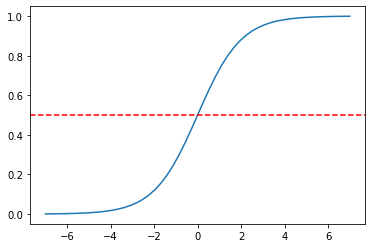

In [87]:
plt.plot(z, sigmoid(z))
plt.axhline(y = 0.5, color = 'r', ls = '--')

z are scores, results given by the linear regression expression. Then sigmoid returns a probability

In [88]:
def linear_regression(xi):
    result = w0
    
    for j in range(w):
        result = result + xi[j]*w[j]
    
    return result

Logistic Regression implementation is very similar to that of Linear Regression, we just need to apply the sigmoid function in the end to return a probability.

In [89]:
def logistic_regression(xi):
    score = w0
    
    for j in range(w):
        score = score + xi[j]*w[j]
        
    result = sigmoid(score)
    
    return result

Both Linear and Logistic Regression are called linear models because the use dot product. Dot product is a linear operator in linear algebra.

Linear models have good qualities such as:
 - Fast to use
 - Fast to train

## 3.10. Training logistic regression with scikit-learn

In [90]:
from sklearn.linear_model import LogisticRegression

- Create the model

In [91]:
model = LogisticRegression()

- Train the model using the train data set

In [92]:
model.fit(X_train, y_train)

LogisticRegression()

- Lets look at the coefficients

In [93]:
model.coef_

array([[ 4.74729176e-01, -1.74868935e-01, -4.07540441e-01,
        -2.96904999e-02, -7.79896991e-02,  6.26829145e-02,
        -8.89745342e-02, -8.13885793e-02, -3.43109205e-02,
        -7.33692785e-02, -3.35203721e-01,  3.16498056e-01,
        -8.89745342e-02,  3.67467953e-03, -2.58135712e-01,
         1.41441211e-01,  9.01430170e-03,  6.25301927e-02,
        -8.89745342e-02, -8.12358575e-02,  2.65580789e-01,
        -8.89745342e-02, -2.84286454e-01, -2.31199784e-01,
         1.23519585e-01, -1.66024914e-01,  5.83447152e-02,
        -8.70071375e-02, -3.20563920e-02,  7.04807583e-02,
        -5.90974278e-02,  1.41441211e-01, -2.49121410e-01,
         2.15470376e-01, -1.20362983e-01, -8.89745342e-02,
         1.01657318e-01, -7.08926384e-02, -8.89745342e-02,
         5.21869735e-02,  2.13374844e-01, -8.89745342e-02,
        -2.32080509e-01, -7.04056642e-02,  3.82374087e-04]])

It is a two-dimensional array (double square brackets) with just 1 row.

In [94]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

- This gives the bias term

In [95]:
model.intercept_[0].round(3)

-0.109

Applying the model we can have two kind of predictions:

- Hard prediction: they already return the exact label, 0 or 1

In [96]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

   - Sof predictions: Returns the probability 

In [97]:
model.predict_proba(X_val)

array([[0.99100277, 0.00899723],
       [0.79548128, 0.20451872],
       [0.78778268, 0.21221732],
       ...,
       [0.86360862, 0.13639138],
       [0.20023411, 0.79976589],
       [0.16259678, 0.83740322]])

predict_proba return an array with 2 columns:
- 1st column: propabilty of the negative class
- 2nd column: propabilty of the positive class

We care about the positive class, the probability of churning, so we take off the first column

In [98]:
y_pred = model.predict_proba(X_val)[:, 1]

y_pred

array([0.00899723, 0.20451872, 0.21221732, ..., 0.13639138, 0.79976589,
       0.83740322])

The soft predictions allows to apply a treshold and decide which value is consider a probability of churning or not.

The default treshold that predict_proba considers is 0.5.

In [99]:
churn_decision = y_pred >= 0.5

- We can select all the customers that are in line with the churn decision and take actions (like send an email, etc)

In [100]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [101]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

**Evaluate how accurate the predictions were using Accuracy**

 - **Accuracy**: Tells us how many correct predictions the model made
 
 - Compare the predictions with the target label (in other words, the error of our predictions) and calculate the mean of the error array

In [102]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [103]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

- We can see some of the observations had a matching result. Let's see using a **Logical Operation**:

In [104]:
y_val == churn_decision.astype(int)

array([ True,  True,  True, ...,  True,  True,  True])

In [105]:
(y_val == churn_decision.astype(int)).mean()

0.8034066713981547

**80% of the predictions match**

Even if the comparison vector is made of Booleans, NumPy will automatically convert them to 1's and 0's and calculate the mean.

- See the big picture in a dataframe

In [106]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val
df_pred["correct"] = (df_pred.prediction == df_pred.actual)
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204519,0,0,True
2,0.212217,0,0,True
3,0.543044,1,1,True
4,0.213780,0,0,True
...,...,...,...,...
1404,0.313678,0,0,True
1405,0.039360,0,1,False
1406,0.136391,0,0,True
1407,0.799766,1,1,True


In [107]:
df_pred.correct.mean()

0.8034066713981547

The model is 80%. In 80% of the cases, when the model says that a person is going to churn or not, the statement is true.

## 3.11. Model interpretation

Join the feature names with the coefficient results using zip and turning into a dictionary

In [108]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

- Take a subset of features to train a smaller model

In [109]:
small = ['contract', 'tenure', 'monthlycharges']

In [110]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


- Turn the top 10 of this small subset in a dictionary and use it for the Vectorizer

In [111]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [112]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [113]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [114]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

- We have 3 binary features for contract value and 2 numerical features for tenure and monthlycharges

- Get the train small feature matrix

In [115]:
X_train_small = dv_small.transform(dicts_train_small)

We are not doing the transform for the validation because we are not interested in measuring the accurracy of the model, that was already done.

We only want to look at the coefficients and interpret them.

In [116]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

We have the model, lets look at the coefficients.


 - Bias term 

In [117]:
w0 = model_small.intercept_[0]
w0

-2.476775657803981

 - Coefficients 

In [118]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

- Join coefficients' names and weights

In [119]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Lets assume a customer:
- Bias: -2.47
- Has a monthly contract: [1 x 0.97 + 0 x (-0.025) + 0 x (+0.949)]
- Pay USD 50  per month: 50 x 0.027
- In the company for 5 months: 5 x (-0.036)

-2.47 + 1 x 0.97 +  50 x 0.027 + 5 X (-0.036)

- Bias term

In [120]:
sigmoid(-2.47)

0.07798823512936635

By default, the probability of a customer leaving the company is very small, about 8%.

- After that we know that person has a monthly contract. Sum that up and the score increases by 0.97

In [121]:
sigmoid(-2.7 + 0.97)

0.1505875797458439

- The probability increased when we learned that the customer has a monthly contract

Add the information about the next coefficients

In [122]:
sigmoid(w0 + w[0] + 50*w[3] + 5*w[4])

0.42225242665310736

For this specific customer, the probability of churn is 42%

## 3.12. Using the model

- Train the model using the full_train data set

    - Get the dictionaries
    - Get the feature matrix
    - Train the model
    - Repeat for the test data set

In [123]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

- Create the DictVectorizer class

- Fit and transform the train data set

In [124]:
dv = DictVectorizer(sparse = False)

X_full_train = dv.fit_transform(dicts_full_train)

- We are missing the y_full_train vector

In [126]:
y_full_train = df_full_train.churn.values

- Train the model

In [128]:
model = LogisticRegression()

model.fit(X_full_train, y_full_train)

LogisticRegression()

- Now repeat the process for the test data set

In [130]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

- **Transform** the list of dictionaries

In [132]:
X_test = dv.transform(dicts_test)

- Apply the model to predict probabilities

In [133]:
y_pred = model.predict_proba(X_test)[:, 1]

In [134]:
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

- **Decide the threshold**

For all the clients that score higher with a probability equal or higher than x, we want to predict they're going to churn-

In [135]:
churn_decision = (y_pred >= 0.5)

To see if this decision is correct, compare it with y_test to compute **accuracy**

In [136]:
(churn_decision == y_test).mean()

0.815471965933286

The results were more accurate than the results from the validation data set (maybe because more data was used).

If the results were a little bit less accurate that wouldn't be a problem. What needs to be avoided is when the difference between the results is too large.

- Example, if val_accc = 0.95 but test_acc = 0.8 this is a problem

---

- Use the model on a customer from the test data set

In [137]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [138]:
customer_10 = dicts_test[10]

- We want to compute a score for this customer

In [141]:
X_small = dv.transform([customer_10])
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

- Result for the positive class

In [142]:
model.predict_proba(X_small)[0,1]

0.4056810977938266

- The model predict that this customer is not likely to churn

In [140]:
y_test[10]

0

- The prediction matches with label from y_test